In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [5]:
wine = load_wine()

In [8]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [9]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
df.shape

(178, 13)

In [11]:
df['target'] = wine.target

In [13]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('target', axis =1)
Y = df['target']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [28]:
model = DecisionTreeClassifier()

In [30]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [33]:
model.score(X_test, Y_test)

0.9444444444444444

In [73]:
type(X_train.columns)

pandas.core.indexes.base.Index

In [74]:
model.feature_importances_

array([0.09209357, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.37183384, 0.        , 0.        , 0.02364799,
       0.        , 0.1055714 , 0.40685321])

In [75]:
X_train.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [78]:
Xfeat = np.hstack((model.feature_importances_ , X_train.columns))

In [85]:
X____ = Xfeat.reshape(2,13)

In [87]:
df_Xfeat = pd.DataFrame(X____, columns=X____[1,:])

In [90]:
df_Xfeat.shape

(2, 13)

In [100]:
df_features_importance = df_Xfeat[:1]

In [102]:
df_features_importance.shape

(1, 13)

(array([[0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.]]),
 array([0.0, 0.08137064101489792, 0.16274128202979585, 0.24411192304469376,
        0.3254825640595917, 0.40685320507448963], dtype=object),
 <a list of 13 BarContainer objects>)

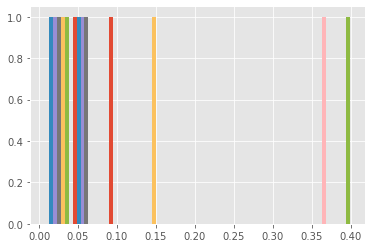

In [103]:
plt.hist(df_features_importance, bins=5)

In [71]:
pd.DataFrame(model.feature_importances_, columns=X_train.columns)

ValueError: Shape of passed values is (13, 1), indices imply (13, 13)

(array([9., 0., 2., 0., 0., 0., 0., 0., 0., 2.]),
 array([0.        , 0.04068532, 0.08137064, 0.12205596, 0.16274128,
        0.2034266 , 0.24411192, 0.28479724, 0.32548256, 0.36616788,
        0.40685321]),
 <BarContainer object of 10 artists>)

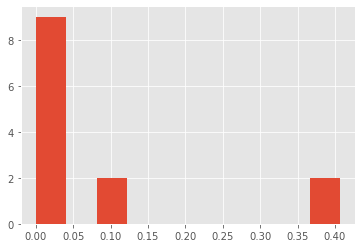

In [68]:
plt.hist(model.feature_importances_, bins=10)

In [54]:
Y_pred = pd.DataFrame(model.predict(X_test), index= X_test.index ,columns=['target'])

In [55]:
Predictions = pd.merge(X_test , Y_pred, left_on=X_test.index, right_on=Y_pred.index)

In [56]:
Predictions.head()

,key_0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0,2
1,117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0,1
2,19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,0
3,69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0,1
4,53,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0,0


In [60]:
Predictions.to_excel(r'C:\Users\elbakkali\Desktop\portefolio\Predictions.xlsx')